In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings('ignore') 

PATH_SUBJ_EVAL = "../0_data/9_evaluation/Masterarbeit MusikAI Umfrage.csv"

In [2]:
# define survey order
survey_order = {
    "orig vs. a1": [
        {"question": 2, "orig": "Song A", "a1": "Song B"},
        {"question": 10, "orig": "Song B", "a1": "Song A"},
        {"question": 4, "orig": "Song A", "a1": "Song B"}
    ],
    "orig vs. d": [
        {"question": 5, "orig": "Song A", "d": "Song B"},
        {"question": 9, "orig": "Song A", "d": "Song B"},
        {"question": 8, "orig": "Song B", "d": "Song A"}
    ],
    "a1 vs. d": [
        {"question": 3, "a1": "Song A", "d": "Song B"},
        {"question": 6, "a1": "Song B", "d": "Song A"},
        {"question": 1, "a1": "Song B", "d": "Song A"}
    ]
}

In [3]:
# load survey data
df_all = pd.read_csv(PATH_SUBJ_EVAL)
df_all.head()

,Zeitstempel,Video 1: Welcher Song gefällt Ihnen besser?,Video 2: Welcher Song gefällt Ihnen besser?,Video 3: Welcher Song gefällt Ihnen besser?,Video 4: Welcher Song gefällt Ihnen besser?,Video 5: Welcher Song gefällt Ihnen besser?,Video 6: Welcher Song gefällt Ihnen besser?,Video 7: Welcher Song gefällt Ihnen besser?,Video 8: Welcher Song gefällt Ihnen besser?,Video 9: Welcher Song gefällt Ihnen besser?,Video 10: Welcher Song gefällt Ihnen besser?,"War es schwierig für Sie, sich für einen Song zu entscheiden oder war die Wahl immer klar?",Ist Ihnen Musik wichtig?,Haben Sie eine musikalische Affinität?,Spielen Sie ein Instrument?,Welchem Geschlecht fühlen Sie sich zugehörig?,Wie alt sind Sie?
0,2023/05/03 11:40:32 PM OESZ,Song B,Song A,Song A,Song B,Song B,Song A,Song B,Song A,Song B,Song B,3,NaN,NaN,NaN,männlich,18-25
1,2023/05/09 11:57:50 AM OESZ,Song A,Song A,Song B,Song B,Song B,Song B,Song B,Song B,Song A,Song B,2,sehr wichtig,ja,"ja, hobbymäßig",männlich,25-35
2,2023/05/09 12:31:35 PM OESZ,Song B,Song A,Song B,Song A,Song B,Song B,Song A,Song B,Song A,Song A,4,normal,nein,nein,weiblich,18-25
3,2023/05/09 12:32:27 PM OESZ,Song B,Song A,Song A,Song B,Song A,Song A,Song B,Song B,Song B,Song B,4,sehr wichtig,ja,nein,männlich,18-25
4,2023/05/09 12:37:31 PM OESZ,Song B,Song A,Song B,Song B,Song B,Song B,Song B,Song B,Song B,Song B,4,normal,ja,"ja, hobbymäßig",weiblich,18-25


In [4]:
# clean data and rename columns
print(len(df_all))
df_cleaned = df_all[df_all["Video 7: Welcher Song gefällt Ihnen besser?"] == "Song B"]
df_cleaned.drop(columns=["Video 7: Welcher Song gefällt Ihnen besser?"], inplace=True)
print(len(df_cleaned))

for comparison in survey_order:
        comp1 = (comparison.split(" vs. "))[0]
        comp2 = (comparison.split(" vs. "))[1]
        for i,q in enumerate(survey_order[comparison]):
            df_cleaned.rename({f"Video {q['question']}: Welcher Song gefällt Ihnen besser?": f"{comparison}_v{i+1}"}, axis=1, inplace=True)
            df_cleaned[f"{comparison}_v{i+1}"].replace({q[comp1]: comp1, q[comp2]: comp2}, inplace=True)

df_cleaned.rename(columns={
    "War es schwierig für Sie, sich für einen Song zu entscheiden oder war die Wahl immer klar?" : "decision",
    "Ist Ihnen Musik wichtig?": "music_importance",
    "Haben Sie eine musikalische Affinität?": "musical_affinity",
    "Spielen Sie ein Instrument?": "instrument",
    "Welchem Geschlecht fühlen Sie sich zugehörig?": "gender",
    "Wie alt sind Sie?": "age"
    }, inplace=True)

df_cleaned["decision"].replace({1: "1 very difficult", 2: "2 difficult", 3: "3 equally", 4: "4 easy", 5: "5 very easy"}, inplace=True)
df_cleaned["music_importance"].replace({"sehr wichtig": "very important"}, inplace=True)
df_cleaned["musical_affinity"].replace({"ja": "yes", "nein": "no"}, inplace=True)
df_cleaned["instrument"].replace({"ja, hobbymäßig": "yes (hobby)", "ja, professionell": "yes (professional)", "nein": "no"}, inplace=True)
df_cleaned["gender"].replace({"männlich": "male", "weiblich": "female"}, inplace=True)

df_cleaned.head()

56
46


,Zeitstempel,a1 vs. d_v3,orig vs. a1_v1,a1 vs. d_v1,orig vs. a1_v3,orig vs. d_v1,a1 vs. d_v2,orig vs. d_v3,orig vs. d_v2,orig vs. a1_v2,decision,music_importance,musical_affinity,instrument,gender,age
0,2023/05/03 11:40:32 PM OESZ,a1,orig,a1,a1,d,d,d,d,orig,3 equally,NaN,NaN,NaN,male,18-25
1,2023/05/09 11:57:50 AM OESZ,d,orig,d,a1,d,a1,orig,orig,orig,2 difficult,very important,yes,yes (hobby),male,25-35
3,2023/05/09 12:32:27 PM OESZ,a1,orig,a1,a1,orig,d,orig,d,orig,4 easy,very important,yes,no,male,18-25
4,2023/05/09 12:37:31 PM OESZ,a1,orig,d,a1,d,a1,orig,d,orig,4 easy,normal,yes,yes (hobby),female,18-25
5,2023/05/09 12:40:17 PM OESZ,a1,orig,a1,a1,d,d,orig,d,a1,3 equally,very important,no,no,male,25-35


Text(0.5, 1.0, 'a1 vs. d')

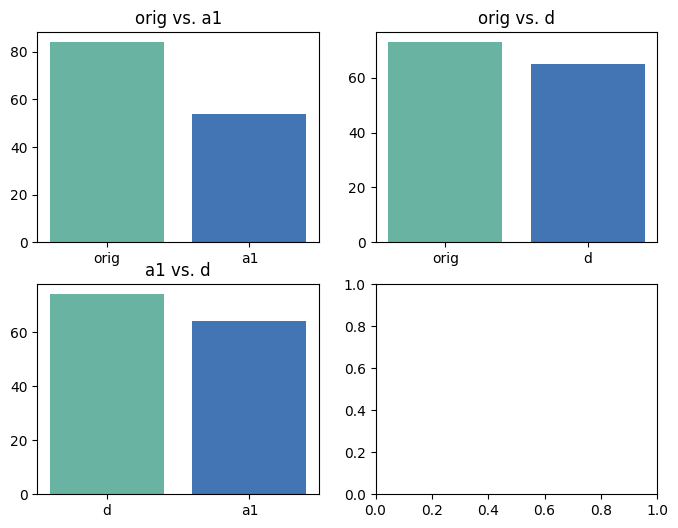

In [5]:
# plot distribution of answers
melted_dfs = [None, None, None ]
names = ["orig vs. a1", "orig vs. d", "a1 vs. d"]

for i, name in enumerate(names):
    questions = [ f"{name}_v1", f"{name}_v2", f"{name}_v3"]

    melted_dfs[i] = pd.melt(df_cleaned, value_vars=questions, var_name='questions', value_name='answers')

figure, axis = plt.subplots(2, 2)
figure.set_size_inches(8, 6)
  
axis[0, 0].bar(melted_dfs[0]["answers"].value_counts().index, melted_dfs[0]["answers"].value_counts(),  color=["#69b3a2", "#4374B3"])
axis[0, 0].set_title(names[0])

axis[0, 1].bar(melted_dfs[1]["answers"].value_counts().index, melted_dfs[1]["answers"].value_counts(),  color=["#69b3a2", "#4374B3"])
axis[0, 1].set_title(names[1])

axis[1, 0].bar(melted_dfs[2]["answers"].value_counts().index, melted_dfs[2]["answers"].value_counts(),  color=["#69b3a2", "#4374B3"])
axis[1, 0].set_title(names[2])

In [6]:
# print significance for answers
for melt_df in melted_dfs:
    responses = melt_df["answers"].value_counts()
    print("higher: ", responses.index[0])

    number_of_yes_responses = responses[0]
    total_responses = responses.sum()

    expected_proportion = 0.5
    pvalue = stats.binom_test(number_of_yes_responses, total_responses, expected_proportion)

    print('p-value:', pvalue)

higher:  orig
p-value: 0.013273216041919202
higher:  orig
p-value: 0.5514132796665477
higher:  d
p-value: 0.44371500352667137


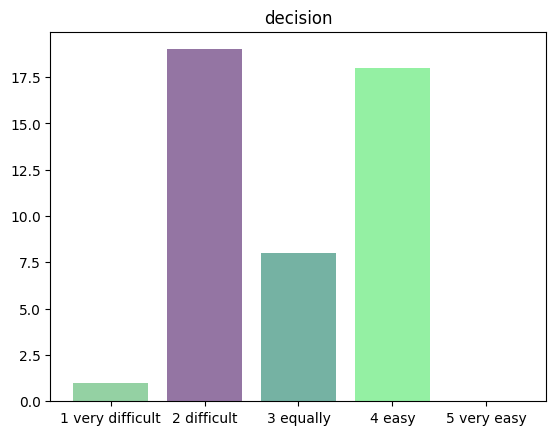

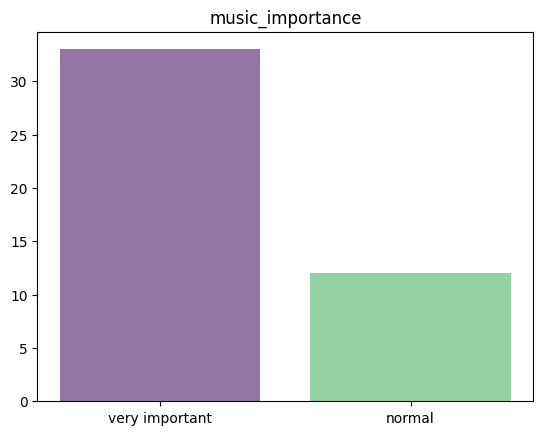

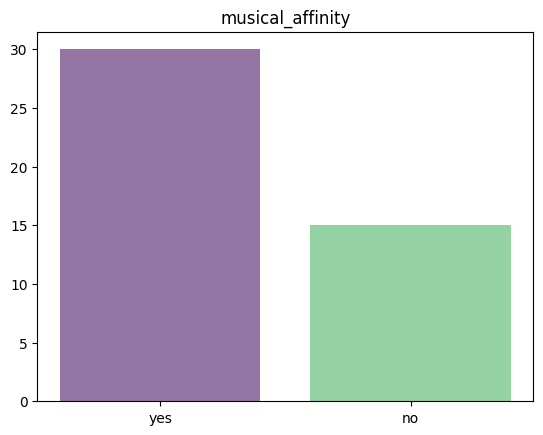

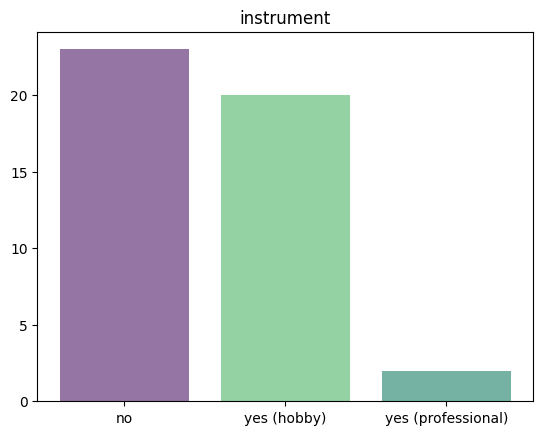

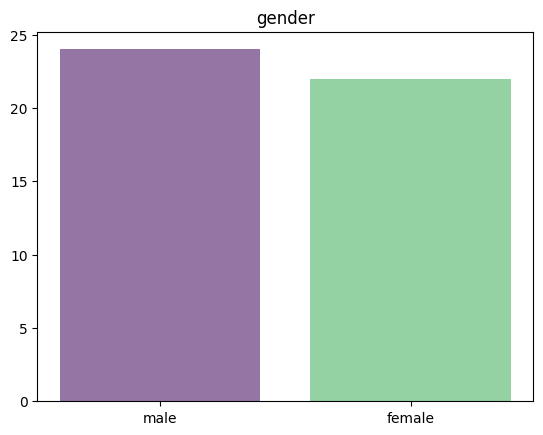

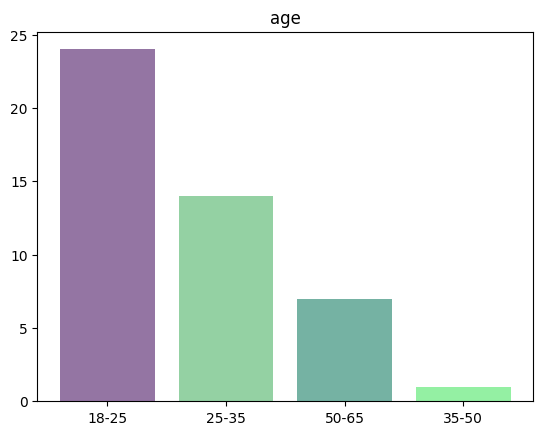

In [7]:
# plot distribution of categorical variables
for hue in ["decision", "music_importance", "musical_affinity", "instrument", "gender", "age"]:
    if hue == "decision":
        my_order = ['1 very difficult', '2 difficult', '3 equally', '4 easy', "5 very easy"] # replace with your order
        df_cleaned[hue] = pd.Categorical(df_cleaned[hue], categories=my_order, ordered=True)
        counts = df_cleaned[hue].value_counts().sort_index()
        plt.bar(counts.index, counts, color=[(0.3,0.7,0.4,0.6), (0.3,0.1,0.4,0.6), (0.1,0.5,0.4,0.6), (0.3,0.9,0.4,0.6)])
        plt.title(hue)
        plt.show()
    else:
        plt.bar(df_cleaned[hue].value_counts().index, df_cleaned[hue].value_counts(), color=[(0.3,0.1,0.4,0.6), (0.3,0.7,0.4,0.6), (0.1,0.5,0.4,0.6), (0.3,0.9,0.4,0.6)])
        plt.title(hue)
        plt.show()

In [8]:
def countplot(df, questions, hue_col, name, color_palette="rainbow"):
    """
    Creates a countplot using seaborn for a given dataframe.

    :param df: pandas DataFrame, data to be visualized
    :param questions: list of strings, column names in df that are considered as categories 
    :param hue_col: string, column name in df, used to map plot aspects to different colors
    :param name: string, the name that will be used for x label, plot title
    :param color_palette: string, name of the palette to be used. Default is "rainbow"
    :return: None
    """
    melted_df = pd.melt(df, id_vars=hue_col, value_vars=questions, var_name='questions', value_name='answers')

    sns.countplot(data=melted_df, x='answers', hue=hue_col, palette=color_palette)
    plt.xlabel(name)
    plt.ylabel('Count')
    plt.title(name)
    plt.legend(title=hue_col)
    plt.show()

In [9]:
def countplot_percentage(df, questions, hue_col, name, color_palette="rainbow"):
    """
    Creates a percentage plot using seaborn for a given dataframe.

    :param df: pandas DataFrame, data to be visualized
    :param questions: list of strings, column names in df that are considered as categories 
    :param hue_col: string, column name in df, used to map plot aspects to different colors
    :param name: string, the name that will be used for x label, plot title
    :param color_palette: string, name of the palette to be used. Default is "rainbow"
    :return: None
    """
    melted_df = pd.melt(df, id_vars=hue_col, value_vars=questions, var_name='questions', value_name='answers')

    # create a dataframe that holds the percentages
    melted_df = melted_df.groupby(['answers', hue_col]).size().reset_index(name='counts')
    melted_df['percentage'] = melted_df.groupby(hue_col)['counts'].apply(lambda x: np.round(x / x.sum() * 100, 2))

    # sort values
    melted_df["sort"] = melted_df["answers"] == "orig"
    melted_df.sort_values(by=['sort'], ascending=False, inplace=True)
    melted_df.drop('sort', axis=1, inplace=True)

    # create the countplot but use 'percentage' for y-value instead of count
    sns.barplot(data=melted_df, x='answers', y='percentage', hue=hue_col, palette=color_palette)
    
    plt.xlabel(name)
    plt.ylabel('Percentage')
    plt.title(name)
    plt.legend(title=hue_col)
    plt.show()

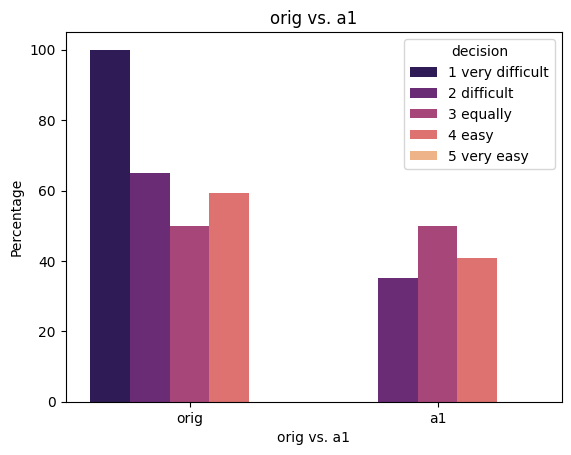

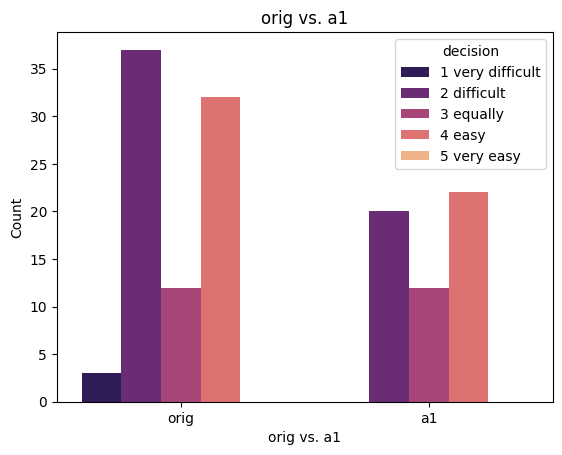

answers           a1  orig
decision                  
1 very difficult   0     3
2 difficult       20    37
3 equally         12    12
4 easy            22    32
Fishers Exact Test
Fisher Exact Test failed
Chi2 Test
Chi2: 3.5689532473158194 p-Value: 0.31192861466209154


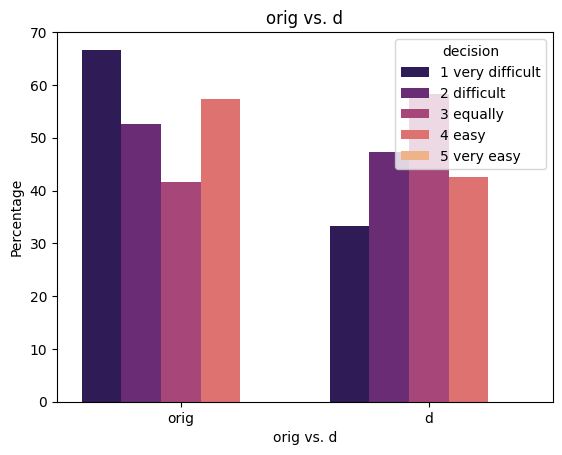

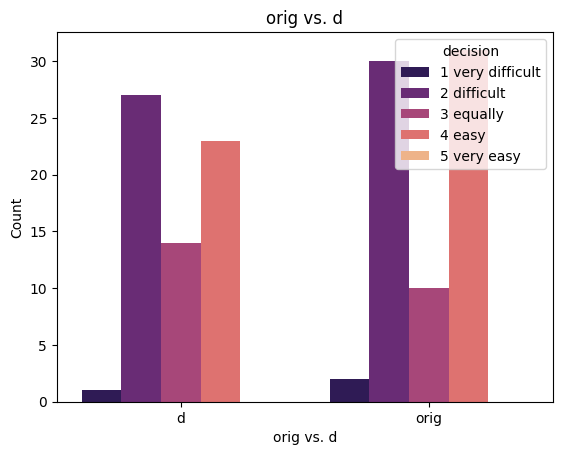

answers            d  orig
decision                  
1 very difficult   1     2
2 difficult       27    30
3 equally         14    10
4 easy            23    31
Fishers Exact Test
Fisher Exact Test failed
Chi2 Test
Chi2: 1.885648790046771 p-Value: 0.596476434590343


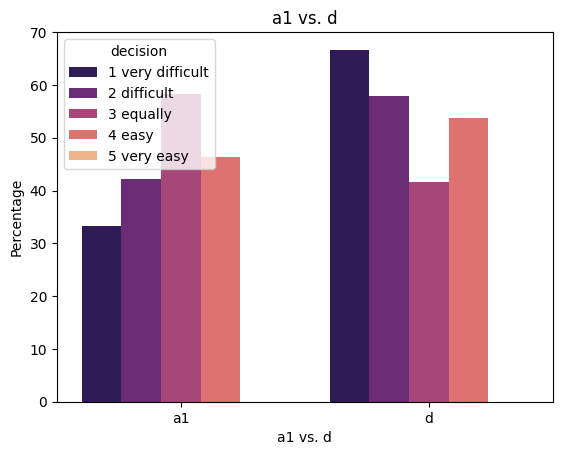

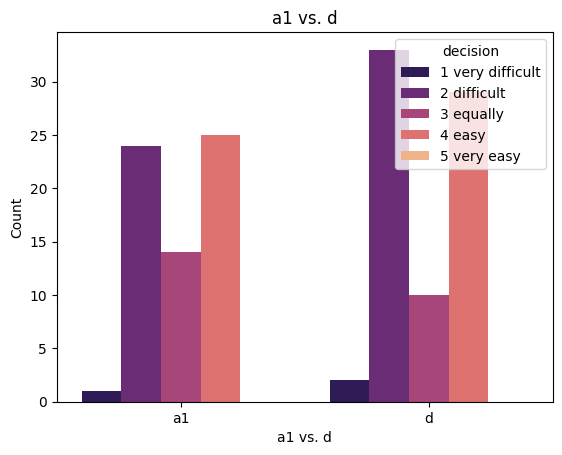

answers           a1   d
decision                
1 very difficult   1   2
2 difficult       24  33
3 equally         14  10
4 easy            25  29
Fishers Exact Test
Fisher Exact Test failed
Chi2 Test
Chi2: 2.0032302038880987 p-Value: 0.5717365343250962


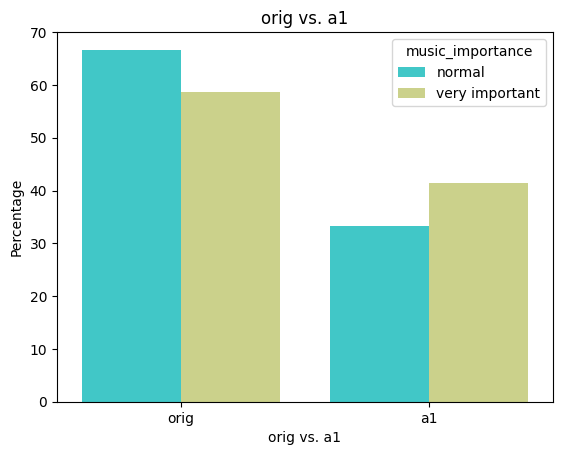

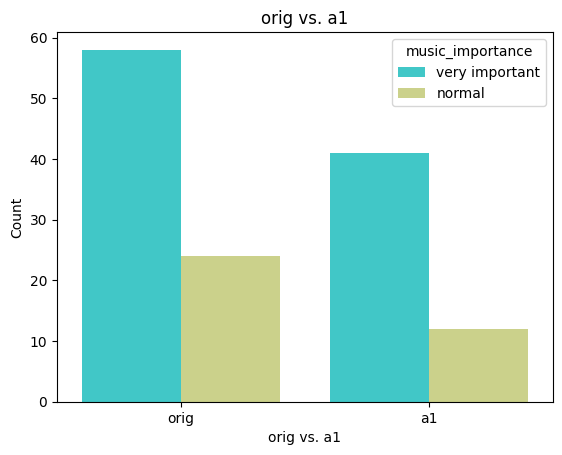

answers           a1  orig
music_importance          
normal            12    24
very important    41    58
Fishers Exact Test
Odds Ratio: 0.7073170731707317 p-Value: 0.4316183072331338
Chi2 Test
Chi2: 0.42376349203028885 p-Value: 0.5150650837241282


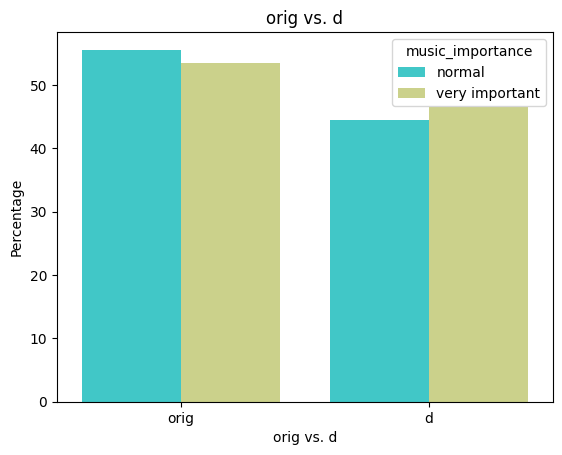

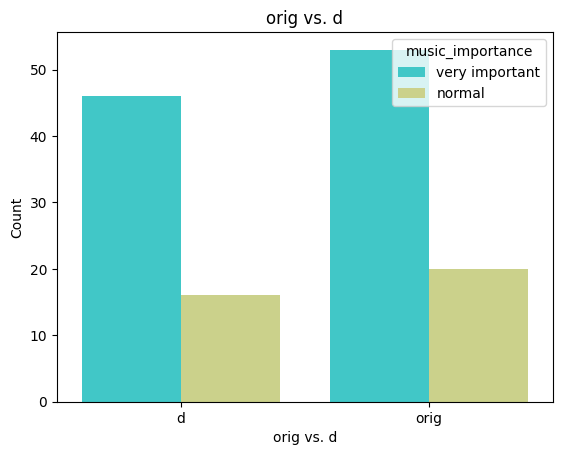

answers            d  orig
music_importance          
normal            16    20
very important    46    53
Fishers Exact Test
Odds Ratio: 0.9217391304347826 p-Value: 0.8480739282474213
Chi2 Test
Chi2: 0.00016947535451734139 p-Value: 0.9896132167212283


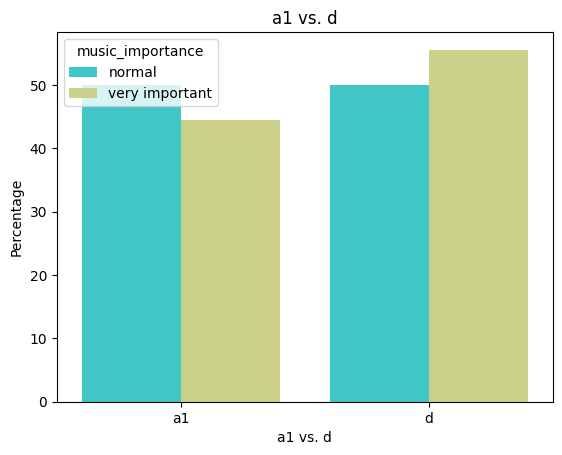

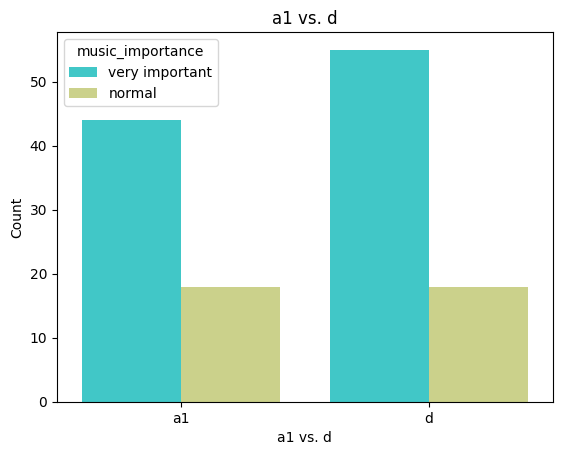

answers           a1   d
music_importance        
normal            18  18
very important    44  55
Fishers Exact Test
Odds Ratio: 1.25 p-Value: 0.6964781305638699
Chi2 Test
Chi2: 0.14252877314907783 p-Value: 0.7057798998918825


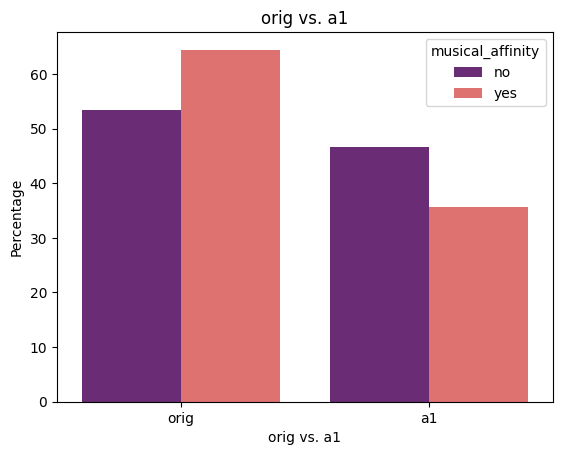

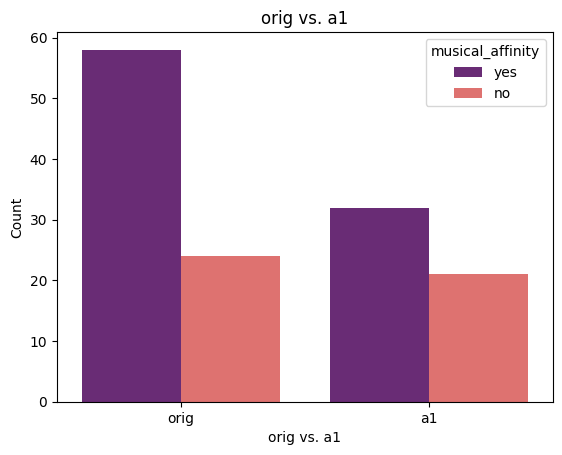

answers           a1  orig
musical_affinity          
no                21    24
yes               32    58
Fishers Exact Test
Odds Ratio: 1.5859375 p-Value: 0.2625880666387774
Chi2 Test
Chi2: 1.1221525540727106 p-Value: 0.28945542510237726


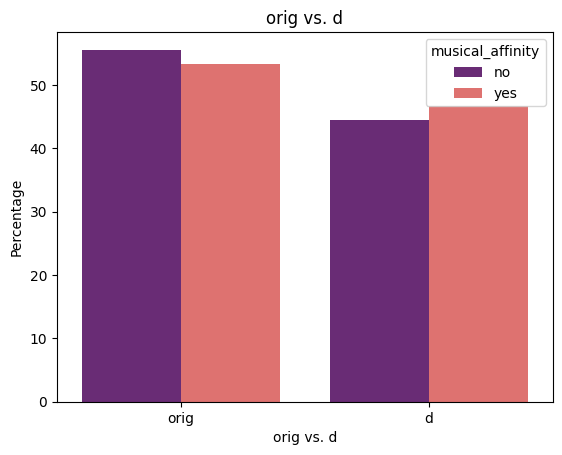

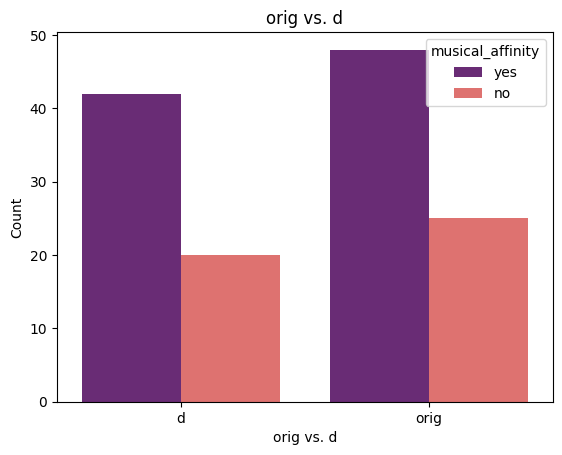

answers            d  orig
musical_affinity          
no                20    25
yes               42    48
Fishers Exact Test
Odds Ratio: 0.9142857142857143 p-Value: 0.855937548668466
Chi2 Test
Chi2: 0.003728457799381352 p-Value: 0.9513105498903704


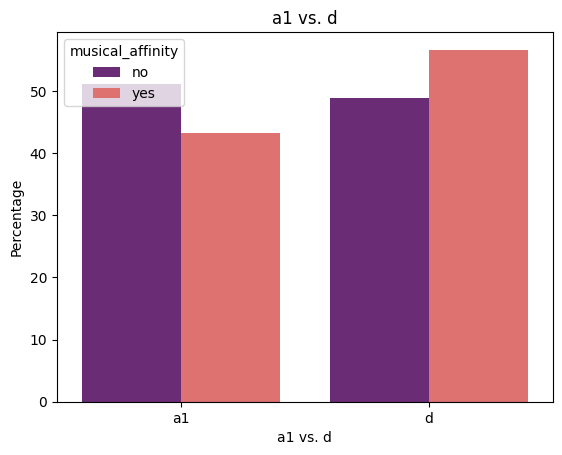

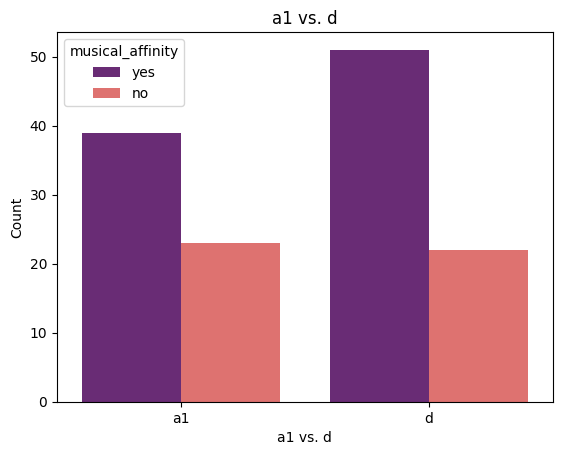

answers           a1   d
musical_affinity        
no                23  22
yes               39  51
Fishers Exact Test
Odds Ratio: 1.367132867132867 p-Value: 0.46465699598690463
Chi2 Test
Chi2: 0.4511433937251436 p-Value: 0.5017924744805251


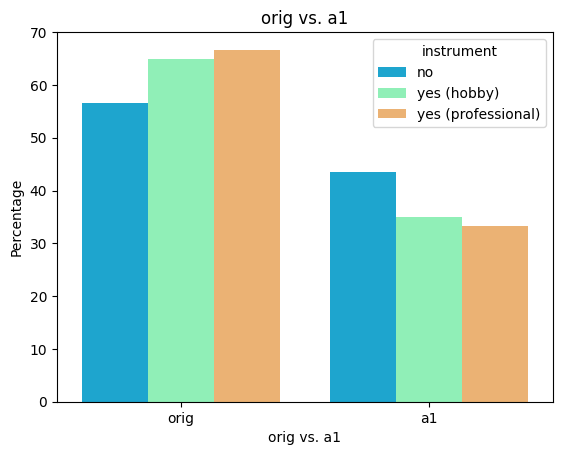

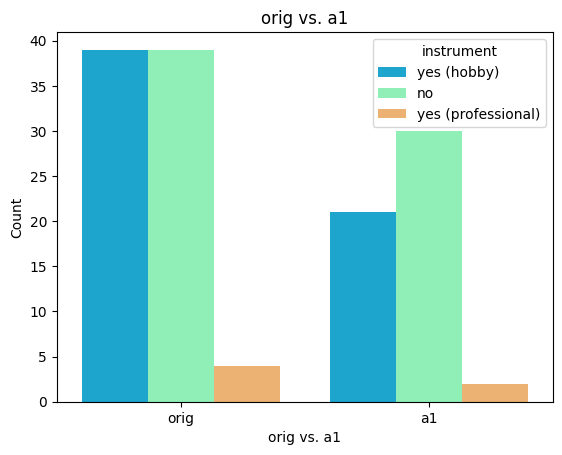

answers             a1  orig
instrument                  
no                  30    39
yes (hobby)         21    39
yes (professional)   2     4
Fishers Exact Test
Fisher Exact Test failed
Chi2 Test
Chi2: 1.0598576402088884 p-Value: 0.5886468680097623


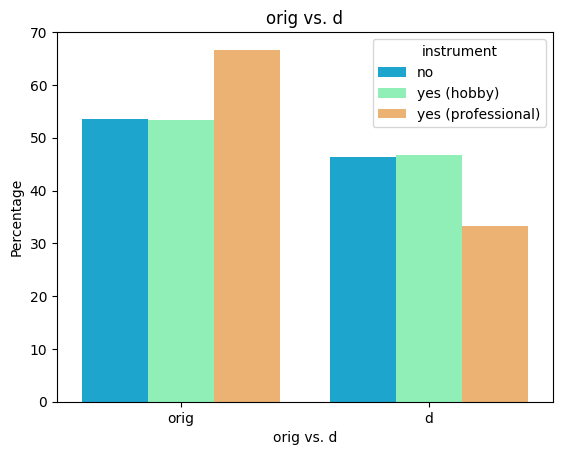

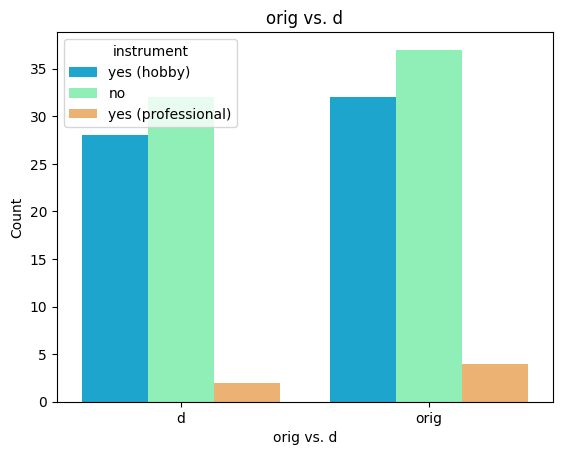

answers              d  orig
instrument                  
no                  32    37
yes (hobby)         28    32
yes (professional)   2     4
Fishers Exact Test
Fisher Exact Test failed
Chi2 Test
Chi2: 0.40202501488981524 p-Value: 0.8179022016231577


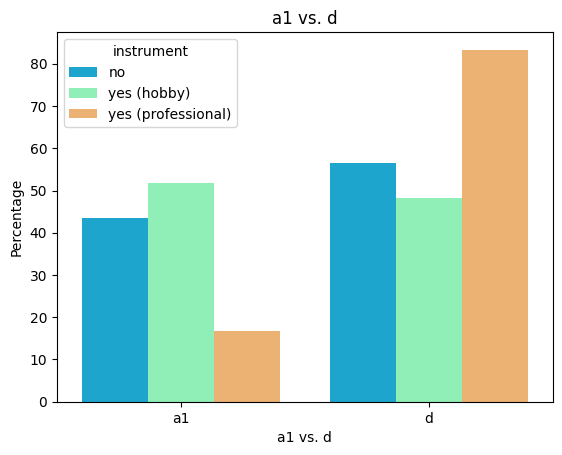

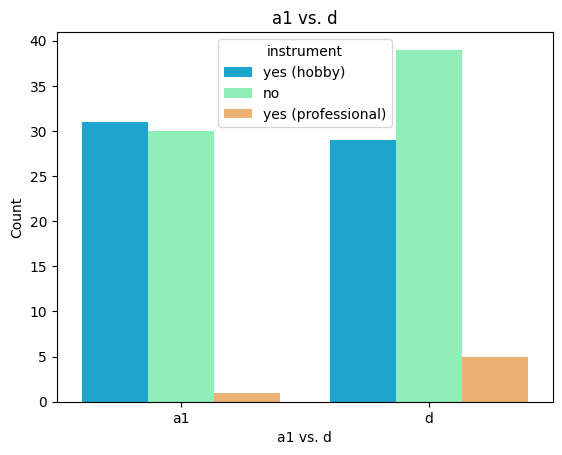

answers             a1   d
instrument                
no                  30  39
yes (hobby)         31  29
yes (professional)   1   5
Fishers Exact Test
Fisher Exact Test failed
Chi2 Test
Chi2: 3.0310740840361965 p-Value: 0.21969017030879603


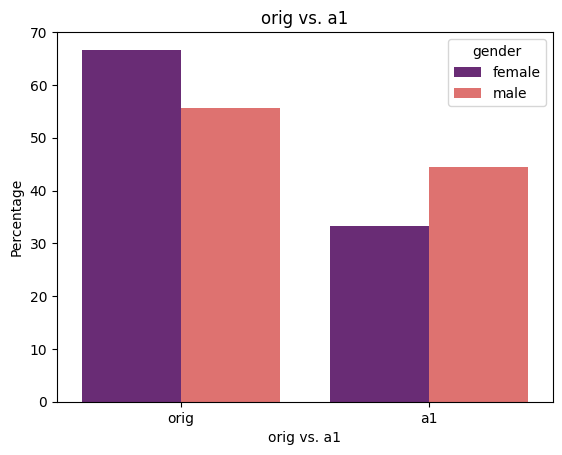

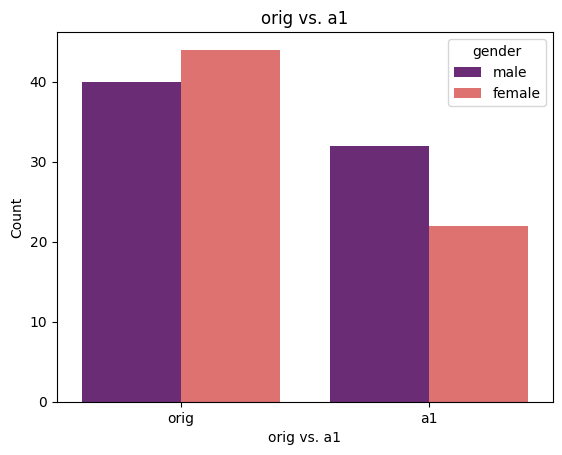

answers  a1  orig
gender           
female   22    44
male     32    40
Fishers Exact Test
Odds Ratio: 0.625 p-Value: 0.2223907330102518
Chi2 Test
Chi2: 1.3488230519480524 p-Value: 0.24548397785917705


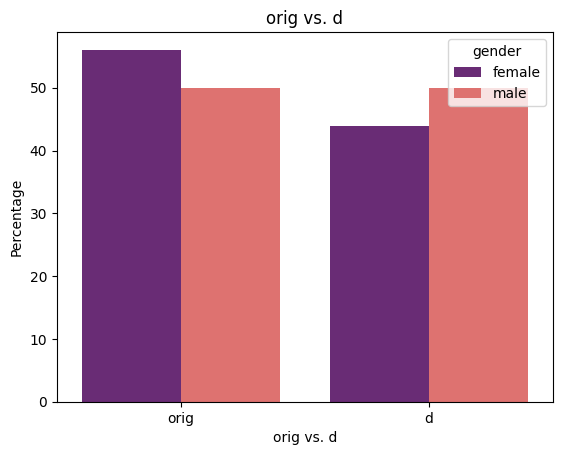

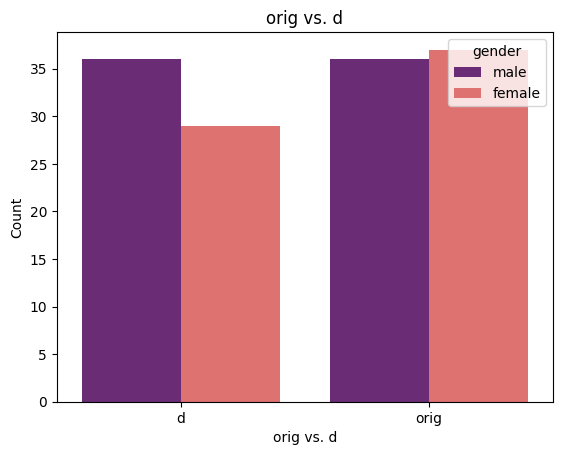

answers   d  orig
gender           
female   29    37
male     36    36
Fishers Exact Test
Odds Ratio: 0.7837837837837838 p-Value: 0.49917030741318374
Chi2 Test
Chi2: 0.293531468531469 p-Value: 0.5879663192428785


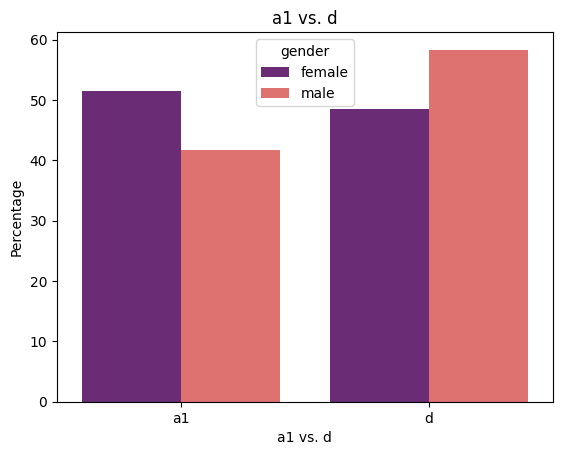

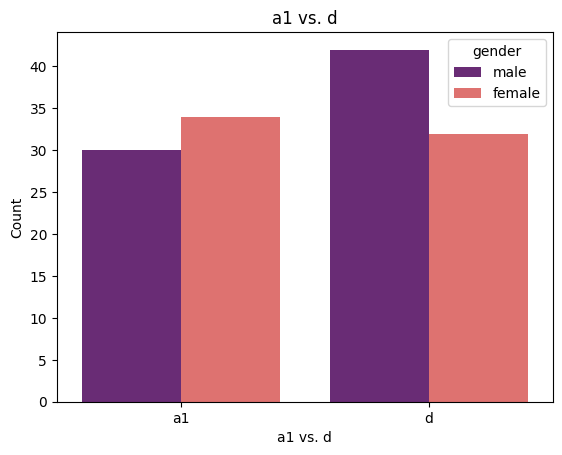

answers  a1   d
gender         
female   34  32
male     30  42
Fishers Exact Test
Odds Ratio: 1.4875 p-Value: 0.30561039324634787
Chi2 Test
Chi2: 0.9761953892813261 p-Value: 0.3231399117768187


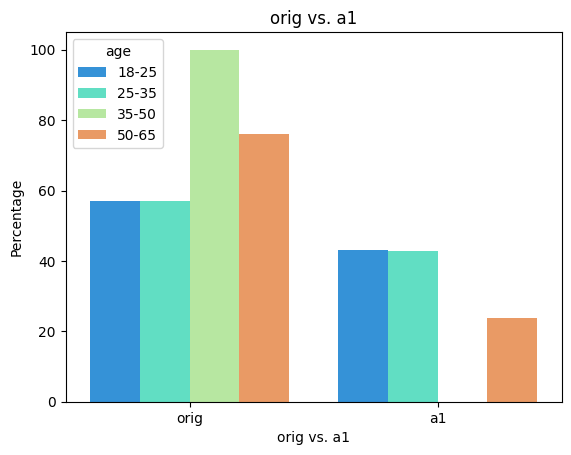

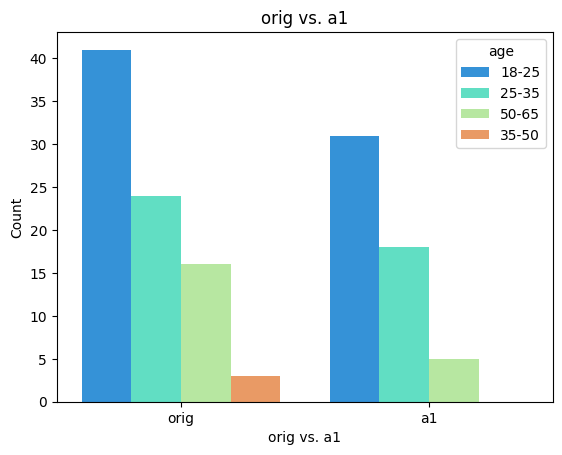

answers  a1  orig
age              
18-25    31    41
25-35    18    24
35-50     0     3
50-65     5    16
Fishers Exact Test
Fisher Exact Test failed
Chi2 Test
Chi2: 4.7087270093222475 p-Value: 0.19441097339480104


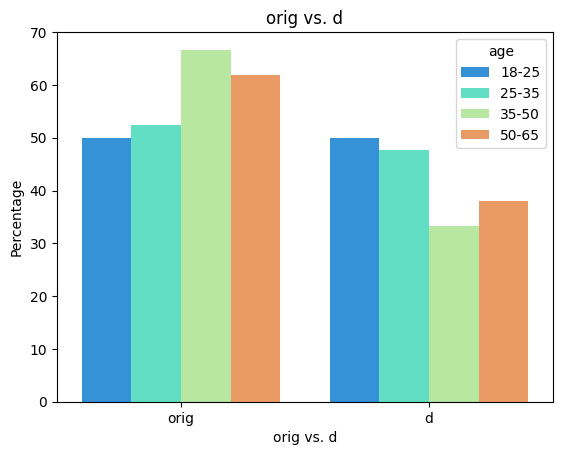

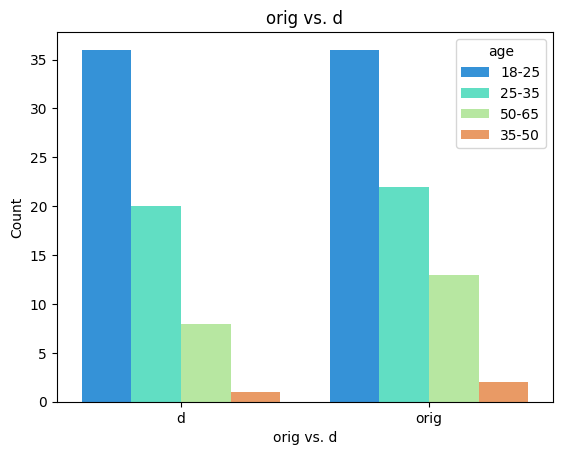

answers   d  orig
age              
18-25    36    36
25-35    20    22
35-50     1     2
50-65     8    13
Fishers Exact Test
Fisher Exact Test failed
Chi2 Test
Chi2: 1.1591750715038398 p-Value: 0.7628115277189323


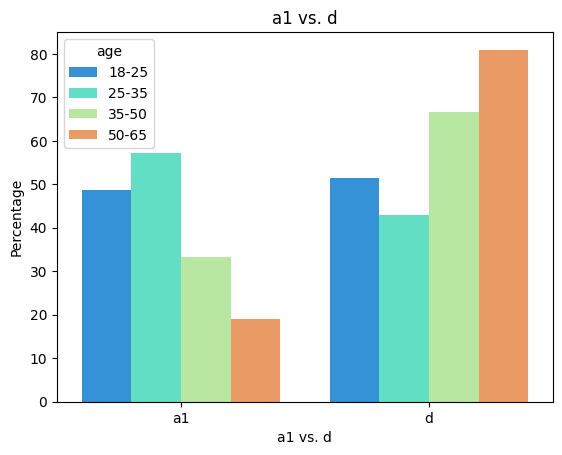

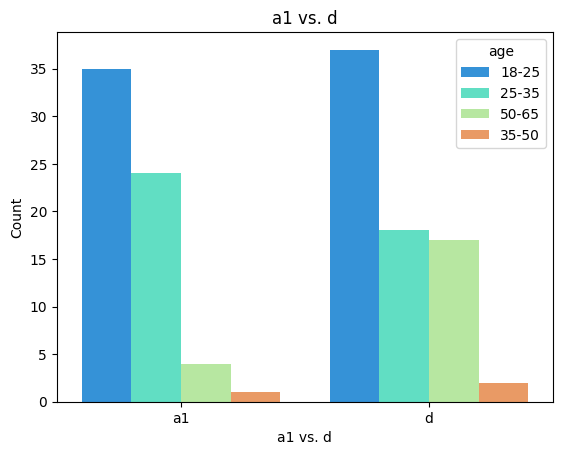

answers  a1   d
age            
18-25    35  37
25-35    24  18
35-50     1   2
50-65     4  17
Fishers Exact Test
Fisher Exact Test failed
Chi2 Test
Chi2: 8.614246500965251 p-Value: 0.034884673631293744


In [10]:
# plot answers colored with different categorical variables and print significance
for i, hue in enumerate(["decision", "music_importance", "musical_affinity", "instrument", "gender", "age"]):
    for name in ["orig vs. a1", "orig vs. d", "a1 vs. d"]:
        palette = "magma" if i % 2 == 0 else "rainbow"
        questions = [ f"{name}_v1", f"{name}_v2", f"{name}_v3"]
        countplot_percentage(df_cleaned, questions, hue, name, color_palette=palette)
        countplot(df_cleaned, questions, hue, name, color_palette=palette)

        melted_df = pd.melt(df_cleaned, id_vars=hue, value_vars=questions, var_name='questions', value_name='answers')
        contingency_table = pd.crosstab(melted_df[hue], melted_df['answers'])
        print(contingency_table)
        try:
            print("Fishers Exact Test")
            oddsratio, pvalue = stats.fisher_exact(contingency_table)
            print("Odds Ratio:", oddsratio, "p-Value:", pvalue)
        except:
            print("Fisher Exact Test failed")
        try:
            print("Chi2 Test")
            chi2, pvalue, _, _ = stats.chi2_contingency(contingency_table)
            print("Chi2:", chi2, "p-Value:", pvalue)
        except:
            print("Chi2 Test failed")